In [88]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF

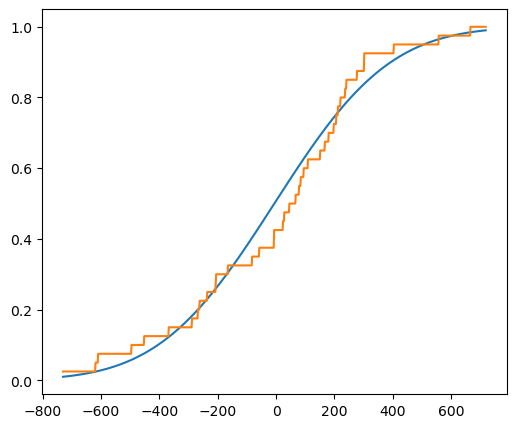

среднее арифметическое ПД  = -6.05
эмпирическое стандартное отклонение ПД  = 311.34763127411134
квартиль L = -216.0507860422171
квартиль Н = 203.9507860422171
количество ПД от L до H = 19
Расстояние мужду функциями распределения = 0.12378272856373307


In [102]:
def name_task(text):
    
    data= np.array(text.split(', ')).astype(int)
    mu=data.mean()
    sigma = data.std()

    X=scipy.stats.norm(mu,sigma)

    L = X.ppf(0.25)
    H = X.ppf(0.75)

    lenLH = len(data[np.logical_and(data>L,data<H)])


    Fexp = ECDF(data)

    fig, ax = plt.subplots(figsize=(6,5))
    xx=np.linspace(X.ppf(0.01),X.ppf(0.99),1000)
    ax.plot(xx,X.cdf(xx))
    ax.plot(xx,Fexp(xx))
    plt.show()
    data_sort=np.sort(data)

    length_ff=max([max(np.abs((i+1)/len(data)-X.cdf(data_sort[i])),np.abs((i)/len(data)-X.cdf(data_sort[i]))) for i in range(len(data))]) # equals to scipy.stats.kstest(data,X.cdf)[0]

    dict_k=list(zip('среднее арифметическое ПД ,эмпирическое стандартное отклонение ПД ,квартиль L,квартиль Н,количество ПД от L до H,Расстояние мужду функциями распределения'.split(','),[mu,sigma,L,H,lenLH,length_ff]))
    for i in dict_k:
        print(i[0]+' = '+str(i[1]))

name_task('-208, 94, -739, -58, 179, 78, -237, 23, 236, 277, 301, 241, -165, 67, 211, -369, 666, 84, 220, -83, 166, -496, 205, 108, 45, 197, -452, -268, 150, 27, -206, -7, -263, -7, -611, 556, -620, 302, 403, -289')

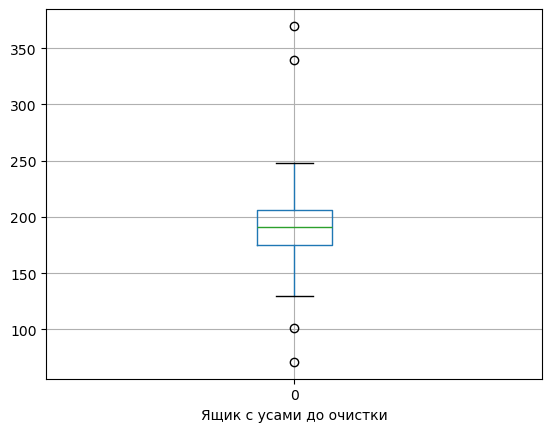

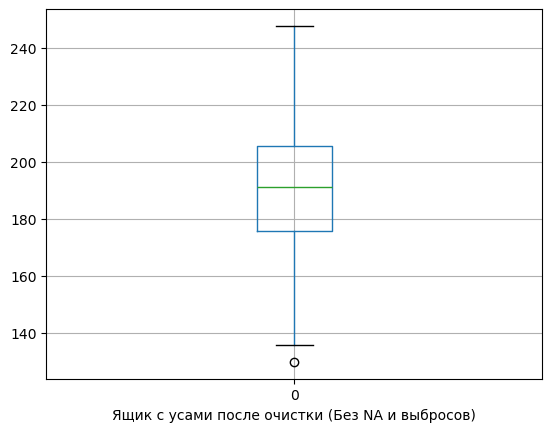

,0
Объем выборки до удаления пропущенных данных,300.000000
Количество пропущенных данных (NA),-47.000000
Объем выборки после удаления пропущенных данных,253.000000
Минимальное значение в вариационном ряду,71.076855
Максимальное значение в вариационном ряду,369.864755
Размах выборки,298.787900
Значение первой квартили (Q1),174.985900
Значение медианы (Q2),191.206430
Значение третьей квартили (Q3),205.835970
Квартильный размах,30.850070


In [90]:
import pandas as pd

def from_big_text(data:str,splitter:str):
    
    index = pd.Index('''Объем выборки до удаления пропущенных данных
Количество пропущенных данных (NA)
Объем выборки после удаления пропущенных данных
Минимальное значение в вариационном ряду
Максимальное значение в вариационном ряду
Размах выборки
Значение первой квартили (Q1)
Значение медианы (Q2)
Значение третьей квартили (Q3)
Квартильный размах
Среднее выборочное значение
Стандартное отклонение (S) корень из дисп.в (исправленной)
Исправленная дисперсия 
Эксцесс
Коэффициент асимметрии
Ошибка выборки
Значение 63%-квантили
Мода
Как часто встречается "мода"
Верхняя граница нормы (Xst_max)
Нижняя граница нормы (Xst_min)
Количество выбросов ниже нижней нормы
Количество выбросов выше верхней нормы
'''.split('\n'))
    
    data_list=[]
    df=pd.DataFrame([float(i) if i!='NA' else np.nan for i in data.split(splitter)])
    
    length_before=df.size
    data_list.append(length_before)
    
    df=df.dropna()
    length_after=df.size
    data_list.extend([length_after-length_before,length_after])
    
    minn=df.describe().loc['min'].values[0]
    maxx=df.describe().loc['max'].values[0]
    data_list.extend([minn,maxx,maxx-minn])
    
    Q1=df.describe().loc['25%'].values[0]
    Q2=df.describe().loc['50%'].values[0]
    Q3=df.describe().loc['75%'].values[0]
    
    mean = df.describe().loc['mean'].values[0]
    
    data_list.extend([Q1,Q2,Q3,Q3-Q1,mean,df.std(ddof=1)[0],df.var(ddof=1)[0],df.kurt()[0],df.skew()[0]])
    
    data_list.append(data_list[11]/data_list[2]**0.5)
    data_list.extend(df.quantile(0.63))
    
    if df.mode().count()[0] == df.count().iloc[0]:
        data_list.append(0)
        data_list.append(0)
    else:
        data_list.append(df.mode().iloc[0,0])
        data_list.append(df.value_counts()[df.mode().iloc[0,0]])
        
    data_list.extend([data_list[8]+1.5*data_list[9],data_list[6]-1.5*data_list[9]])
    data_list.extend([len(df[df.iloc[:,0]<data_list[20]]),len(df[df.iloc[:,0]>data_list[19]])])
    
    df.boxplot()
    plt.xlabel('Ящик с усами до очистки')
    plt.show()

    clean_df=df[(df.iloc[:,0]>data_list[20]) & (df.iloc[:,0]<data_list[19])]
    clean_df.boxplot()
    plt.xlabel('Ящик с усами после очистки (Без NA и выбросов)')
    plt.show()
    
    
    return pd.DataFrame(data_list,index[:len(data_list)])

textik='196.92971; NA; 136.07691; 196.34805; 199.53462; 170.20138; 197.97725; 202.0997; NA; 194.73865; 168.11473; 137.27056; 227.51421; 187.43231; 135.74843; 168.04959; 158.53354; 186.88781; 207.99242; 174.9859; 200.20625; NA; 224.08094; 170.5565; 158.7361; 180.9028; 182.55506; 221.7838; NA; NA; NA; 239.06614; 158.3426; 195.5757; 164.48166; 166.60759; 247.77945; 190.90885; NA; 339.985965; 174.58393; NA; 196.03865; NA; 203.91763; 170.6796; NA; 223.15341; 222.0477; 208.74949; 212.50459; 198.35273; NA; 152.41688; NA; 369.864755; 230.896; 182.36959; 153.89932; 240.00281; NA; 217.4074; 219.50106; 170.24959; NA; 184.27259; 178.06786; 186.45008; NA; 171.8145; 200.80527; 201.05794; 183.38469; 173.17188; 129.8169; 182.97317; 180.65213; 214.35604; 198.06513; 195.32153; 186.26798; NA; NA; NA; NA; 219.56085; 195.18918; 184.03913; 171.1902; 200.14447; 192.77745; 179.95669; 177.76787; 193.05699; 216.59228; 192.21672; 202.00829; 196.74733; 169.85218; 198.18508; NA; 213.06066; 205.42989; 159.57486; 197.35776; 168.14253; 197.65186; NA; NA; 206.6751; 142.65346; 200.02902; 197.99453; 182.79758; NA; 199.8229; 215.48279; 185.62296; 157.46312; 229.69705; 210.81753; 200.34913; 192.05463; 71.0768550000001; 157.48724; NA; 178.2801; 179.3978; 181.28785; 183.23624; 197.99604; 190.79779; 174.78006; 176.66681; 188.99502; 166.40737; 168.10608; 174.66107; 166.65371; NA; 195.34543; 194.31794; 150.14698; 218.22001; 219.45564; 230.20715; 165.10735; 207.49599; 182.98615; 194.35029; 154.62618; 150.79688; 195.57284; 201.92714; 203.45877; 172.0433; NA; 159.3953; 176.32943; 173.94611; 219.23781; 183.56996; 193.17269; 187.71603; 207.17507; 184.69483; 155.43353; 191.20643; 179.8024; 195.10684; 234.1981; 231.39562; NA; NA; 187.65472; NA; 225.66359; NA; 180.61912; 209.89129; NA; 190.70637; 180.91974; 216.39233; 225.06374; 165.82589; 177.65018; NA; 182.17528; 191.46474; 220.61831; 163.68818; 187.51613; 195.09282; 175.87486; 186.19105; 149.79936; 198.84328; 152.91778; 223.71218; 176.80615; 207.54141; 195.86928; 211.87501; 177.74898; 223.8982; 208.12129; 213.85756; 156.97355; 178.9495; 156.48682; 184.85755; 202.30561; 217.3244; 189.23265; 215.32331; NA; 138.64001; NA; 179.31733; 159.37454; 215.14106; 187.80021; 195.50795; 181.82473; 183.6953; 198.15892; NA; 202.55826; NA; 176.20312; 173.75703; 141.42246; 206.44492; 172.39673; 177.01227; 219.86468; NA; 181.23446; 156.2762; NA; 100.955645; 163.63176; 164.60035; 200.64875; 219.81358; 207.8252; 193.1447; 224.34229; 176.0246; 197.2936; 224.94001; 191.90226; NA; 206.45662; 197.52237; 164.21773; 167.85524; 244.50199; 194.69737; 190.95449; 185.85411; NA; 231.7228; 185.34329; 207.02483; 205.83597; NA; 212.50914; NA; 227.26332; 216.09838; 180.63413; 157.3706; 200.64688; NA; 205.0958; 197.44369; 195.75397; 185.39637; 212.56476; 221.23139; 223.00506; NA; 227.41976; 195.25196; 204.67768; 191.34718; 182.85024; 161.94313; 188.26786; NA; 170.67867; 151.12892; 196.39718; 179.52197; NA; NA; 167.24265; 182.42814'
from_big_text(textik,'; ')

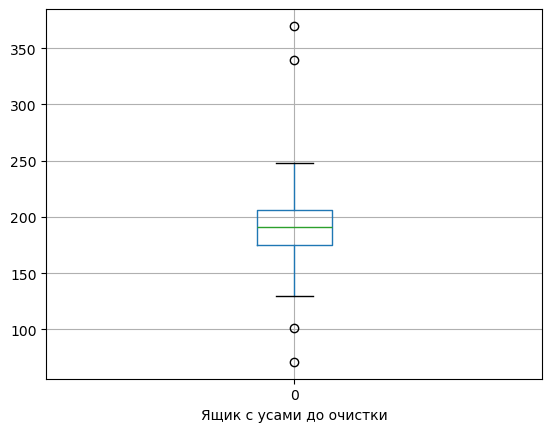

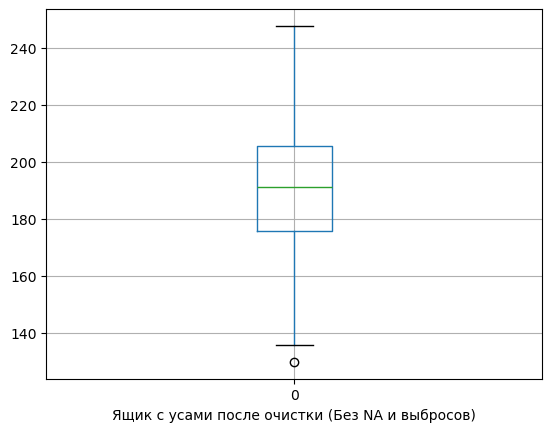

,0
Объем выборки до удаления пропущенных данных,300.000000
Количество пропущенных данных (NA),-47.000000
Объем выборки после удаления пропущенных данных,253.000000
Минимальное значение в вариационном ряду,71.076855
Максимальное значение в вариационном ряду,369.864755
Размах выборки,298.787900
Значение первой квартили (Q1),174.985900
Значение медианы (Q2),191.206430
Значение третьей квартили (Q3),205.835970
Квартильный размах,30.850070


In [91]:
textik='196.92971; NA; 136.07691; 196.34805; 199.53462; 170.20138; 197.97725; 202.0997; NA; 194.73865; 168.11473; 137.27056; 227.51421; 187.43231; 135.74843; 168.04959; 158.53354; 186.88781; 207.99242; 174.9859; 200.20625; NA; 224.08094; 170.5565; 158.7361; 180.9028; 182.55506; 221.7838; NA; NA; NA; 239.06614; 158.3426; 195.5757; 164.48166; 166.60759; 247.77945; 190.90885; NA; 339.985965; 174.58393; NA; 196.03865; NA; 203.91763; 170.6796; NA; 223.15341; 222.0477; 208.74949; 212.50459; 198.35273; NA; 152.41688; NA; 369.864755; 230.896; 182.36959; 153.89932; 240.00281; NA; 217.4074; 219.50106; 170.24959; NA; 184.27259; 178.06786; 186.45008; NA; 171.8145; 200.80527; 201.05794; 183.38469; 173.17188; 129.8169; 182.97317; 180.65213; 214.35604; 198.06513; 195.32153; 186.26798; NA; NA; NA; NA; 219.56085; 195.18918; 184.03913; 171.1902; 200.14447; 192.77745; 179.95669; 177.76787; 193.05699; 216.59228; 192.21672; 202.00829; 196.74733; 169.85218; 198.18508; NA; 213.06066; 205.42989; 159.57486; 197.35776; 168.14253; 197.65186; NA; NA; 206.6751; 142.65346; 200.02902; 197.99453; 182.79758; NA; 199.8229; 215.48279; 185.62296; 157.46312; 229.69705; 210.81753; 200.34913; 192.05463; 71.0768550000001; 157.48724; NA; 178.2801; 179.3978; 181.28785; 183.23624; 197.99604; 190.79779; 174.78006; 176.66681; 188.99502; 166.40737; 168.10608; 174.66107; 166.65371; NA; 195.34543; 194.31794; 150.14698; 218.22001; 219.45564; 230.20715; 165.10735; 207.49599; 182.98615; 194.35029; 154.62618; 150.79688; 195.57284; 201.92714; 203.45877; 172.0433; NA; 159.3953; 176.32943; 173.94611; 219.23781; 183.56996; 193.17269; 187.71603; 207.17507; 184.69483; 155.43353; 191.20643; 179.8024; 195.10684; 234.1981; 231.39562; NA; NA; 187.65472; NA; 225.66359; NA; 180.61912; 209.89129; NA; 190.70637; 180.91974; 216.39233; 225.06374; 165.82589; 177.65018; NA; 182.17528; 191.46474; 220.61831; 163.68818; 187.51613; 195.09282; 175.87486; 186.19105; 149.79936; 198.84328; 152.91778; 223.71218; 176.80615; 207.54141; 195.86928; 211.87501; 177.74898; 223.8982; 208.12129; 213.85756; 156.97355; 178.9495; 156.48682; 184.85755; 202.30561; 217.3244; 189.23265; 215.32331; NA; 138.64001; NA; 179.31733; 159.37454; 215.14106; 187.80021; 195.50795; 181.82473; 183.6953; 198.15892; NA; 202.55826; NA; 176.20312; 173.75703; 141.42246; 206.44492; 172.39673; 177.01227; 219.86468; NA; 181.23446; 156.2762; NA; 100.955645; 163.63176; 164.60035; 200.64875; 219.81358; 207.8252; 193.1447; 224.34229; 176.0246; 197.2936; 224.94001; 191.90226; NA; 206.45662; 197.52237; 164.21773; 167.85524; 244.50199; 194.69737; 190.95449; 185.85411; NA; 231.7228; 185.34329; 207.02483; 205.83597; NA; 212.50914; NA; 227.26332; 216.09838; 180.63413; 157.3706; 200.64688; NA; 205.0958; 197.44369; 195.75397; 185.39637; 212.56476; 221.23139; 223.00506; NA; 227.41976; 195.25196; 204.67768; 191.34718; 182.85024; 161.94313; 188.26786; NA; 170.67867; 151.12892; 196.39718; 179.52197; NA; NA; 167.24265; 182.42814'
from_big_text(textik,'; ')